# Data Visualization



In [2]:
#Please don't modify this function
def readDataFrameFromCloudant(database):
    cloudantdata=spark.read.load(database, "org.apache.bahir.cloudant")

    cloudantdata.createOrReplaceTempView("washing")
    spark.sql("SELECT * from washing").show()
    return cloudantdata

Sampling is one of the most important things when it comes to visualization because often the data set get so huge that you simply

- can't copy all data to a local Spark driver (Data Science Experience is using a "local" Spark driver)
- can't throw all data at the plotting library

Please implement a function which returns a 10% sample of a given data frame:

In [19]:
def getSample(df,spark):
    return df.sample(False,0.1)

Now we want to create a histogram and boxplot. Please ignore the sampling for now and retur a python list containing all temperature values from the data set

In [4]:
def getListForHistogramAndBoxPlot(df,spark):
    result = spark.sql("select temperature,ts from washing where temperature is not null order by ts asc")
    result_rdd = result.rdd.map(lambda row : (row.ts,row.temperature))
    result_array_temperature = result_rdd.map(lambda (ts,temperature): temperature).collect()
    return result_array_temperature

Finally we want to create a run chart. Please return two lists (encapusalted in a python tuple object) containing temperature and timestamp (ts) ordered by timestamp. Please refere to the following link to learn more about tuples in python: https://www.tutorialspoint.com/python/python_tuples.htm

In [5]:
#should return a tuple containing the two lists for timestamp and temperature
#please make sure you take only 10% of the data by sampling
#please also ensure that you sample in a way that the timestamp samples and temperature samples correspond (=> call sample on an object still containing both dimensions)
def getListsForRunChart(df,spark):
    result = spark.sql("select temperature,ts from washing where temperature is not null order by ts asc")
    result_rdd = result.rdd.sample(False,0.1).map(lambda row : (row.ts,row.temperature))
    result_array_ts = result_rdd.map(lambda (ts,temperature): ts).collect()
    result_array_temperature = result_rdd.map(lambda (ts,temperature): temperature).collect()
    return result_array_ts, result_array_temperature

Now it is time to connect to the cloudant database. Please have a look at the Video "Overview of end-to-end scenario" of Week 2 starting from 6:40 in order to learn how to obtain the credentials for the database. Please paste this credentials as strings into the below code

### TODO Please provide your Cloudant credentials here

In [6]:
hostname = "8e9d7d5e-e6f7-4ddc-8a0a-4375b031d58c-bluemix.cloudant.com"
user = "8e9d7d5e-e6f7-4ddc-8a0a-4375b031d58c-bluemix"
pw = "545a7c4e03929959d13ba32bbddf84edaaca10048efe428ac4b9ae0c5c183300"
database = "washing" #as long as you didn't change this in the NodeRED flow the database name stays the same

In [7]:
spark = SparkSession\
    .builder\
    .appName("Cloudant Spark SQL Example in Python using temp tables")\
    .config("cloudant.host",hostname)\
    .config("cloudant.username", user)\
    .config("cloudant.password",pw)\
    .getOrCreate()
cloudantdata=readDataFrameFromCloudant(database)

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|029f45b57ad924ad9...|1-21ca2b5bf2da593...|    9|      11|acceptable|     null|      75| null|         82|1537432207437|   null|
|029f45b57ad924ad9...|1-b3a3a8798b7aff4...|   13|      11|acceptable|     null|      72| null|         88|1537432211445|   null|
|029f45b57ad924ad9...|1-6eb367ac4f426cd...|    7|    null|      null|       67|    null| null|       null|1537432219430|    231|
|029f45b57ad924ad9...|1-8718cbf2d4e06e1...|   22|      11|acceptable|     null|      71| null|        100|1537432220462|   null|
|029f45b57ad924ad9...|1-9db802d1338a043...|   10|    null|      null|       70|    null| null|   

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

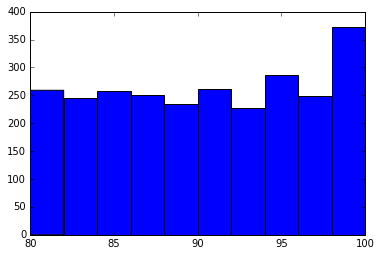

In [9]:
plt.hist(getListForHistogramAndBoxPlot(cloudantdata,spark))
plt.show()

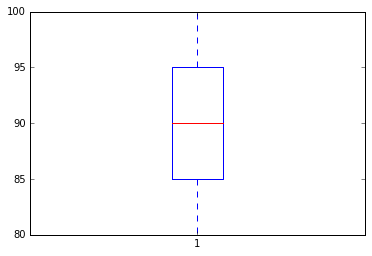

In [10]:
plt.boxplot(getListForHistogramAndBoxPlot(cloudantdata,spark))
plt.show()

In [11]:
lists = getListsForRunChart(cloudantdata,spark)

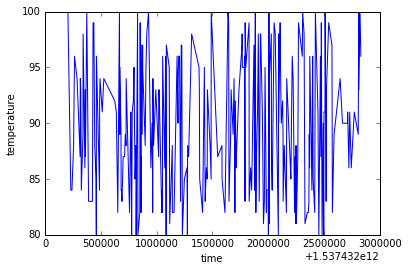

In [12]:
plt.plot(lists[0],lists[1])
plt.xlabel("time")
plt.ylabel("temperature")
plt.show()

Congratulations, you are done! Please download the notebook as python file, name it assignment4.1.py and sumbit it to the grader.